# **PREDICTING TRAVEL INSURANCE PURCHASE USING MACHINE LEARNING**


---


## **BUSINESS UNDERSTANDING**


---


---


### **PROBLEM STATEMENT**

**ExploreXperience** a tour company, has been offering travel insurance to its customers and especially during the Covid-19 pandemic.The Company is seeking to understand which customers would be interested to buy the travel insurance post the pandemic period. Past data on the performance of the sales of the travel insurance package will be used for analysis.

> The significance of utilizing data for this endeavor cannot be overstated. Data-driven insights play an instrumental role in comprehending customer behavior, preferences, and trends. By dissecting past sales records, ExploreXperience gains valuable intelligence on customer demographics, buying patterns, and the efficacy of their previous insurance offerings. This data empowers them to identify key indicators that signify a customer's inclination towards purchasing travel insurance.

The implications of this analysis are profound for ExploreXperience. It allows them to make informed, targeted marketing efforts, optimizing their resources and increasing the likelihood of a successful campaign. By accurately identifying potential customers, they not only enhance their revenue stream but also solidify customer trust and loyalty. This strategic use of data ensures that ExploreXperience remains agile and responsive to changing market dynamics, ultimately securing its position as a forward-thinking industry leader.


<div class="alert alert-block alert-success">
<b>Main objective:</b> The main objective of this project is to come up with a predictive model that will be able to identify customers who are more likely to buy the travel insurance package so as it send them targeted marketing messages
</div>


#### **Other objectives**

The project will also involve an exploratory data analysis to come up with insights and recommendations on what factors determine to a large extend whether a customer will buy or not buy the travel insurance package


#### **Metric for success**

The project will be considered successful if the model has an accuracy of **90%** and has recall of above **80%** and is succesfully deployed into a production enviroment.


## **DATA UNDERSTANDING**


---


---


This dataset has 1987 rows and 10 columns. The columns include:

| Variable Name       | Description                                                                                                                     |
| ------------------- | ------------------------------------------------------------------------------------------------------------------------------- |
| Unnamed             | The id of the data entry                                                                                                        |
| Age                 | Age Of The Customer                                                                                                             |
| Employment Type     | The Sector In Which Customer Is Employed                                                                                        |
| GraduateOrNot       | Whether The Customer Is College Graduate Or Not                                                                                 |
| AnnualIncome        | Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]                                           |
| FamilyMembers       | Number Of Members In Customer's Family                                                                                          |
| ChronicDisease      | Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.                         |
| FrequentFlyer       | Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019] |
| EverTravelledAbroad | Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]                              |
| TravelInsurance     | Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019                                |


#### Reading in the dataset


In [1]:
# importing all the required libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [22]:
# reading in data from a csv file 

df = pd.read_csv("TravelInsurancePrediction.csv")

In [3]:
# checking the first few rows of the dataframe 

df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [5]:
# checking the last few rows of the dataset

df.tail()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1
1986,1986,34,Private Sector/Self Employed,Yes,500000,4,0,No,No,0


### **Data cleaning**


In this section, we will focus on the following tasks:

- Identifying and handling missing values
- Identifying and addressing duplicated values
- Verifying if the dataset has the expected data types for each column
- Identifying and removing redundant columns.


`1. Checking and dealing with missing values in the dataset`


In [6]:
# checking if the dataset has missing values by writing a function

def missing_values_percent(df):
  df_nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Missing values count'])
  df_nulls['% of missing values'] = df.isnull().sum().sort_values(ascending=False)/len(df) 
  return df_nulls




In [7]:
# checking missing values per column 

missing_values_percent(df)

,Missing values count,% of missing values
TravelInsurance,0,0.0
EverTravelledAbroad,0,0.0
FrequentFlyer,0,0.0
ChronicDiseases,0,0.0
FamilyMembers,0,0.0
AnnualIncome,0,0.0
GraduateOrNot,0,0.0
Employment Type,0,0.0
Age,0,0.0
Unnamed: 0,0,0.0


There are `no missing values` for any of the columns for the dataset


`2. Checking and dealing with duplicated values in the dataset`


In [8]:
# checking for any duplicated values in the dataset 

df.duplicated().sum()

0

There are `no duplicated valeus in the dataset`


`3. Checking if dataset has the expected data types`


In [9]:
# checking if the dataset has the expected data types 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


The data types of the various columns of the dataset seem to be as expected except for Chronic diseases and Travel insurance which need to factors


In [23]:
# columns to convert to factors

fct_columns = ['ChronicDiseases','TravelInsurance']

In [24]:
# converting fct columns to object type rather than in interger

df[fct_columns] = df[fct_columns].astype(str)

`4. Checking and dealing with redudant columns in the dataset`


In [26]:
# checking columns and removing any redudant column from the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   object
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   object
dtypes: int64(4), object(6)
memory usage: 155.4+ KB


From the llok of things, it seems that the Column `Unnamed:0` only acts as an index for the records in the dataset and does not provide any meaniful information.


In [27]:
# dropping redudant column 

df = df.drop('Unnamed: 0', axis=1)

In [14]:
# checking the first few rows of the new dataset without redudant column

df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## **EXPLORATORY DATA ANALYSIS**


---


---


### **UNIVARIATE ANALYSIS**


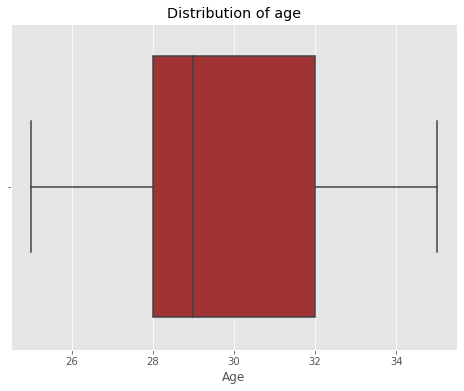

In [20]:
# checking the distribution of age

plt.figure(figsize=(8,6))
sns.boxplot(x="Age", color="firebrick", data=df)
plt.title("Distribution of age")
plt.show()

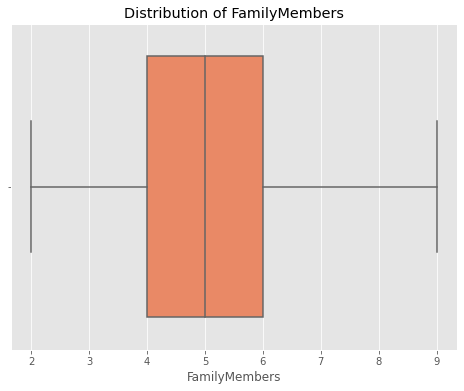

In [29]:
# checking the distribution of family members

plt.figure(figsize=(8,6))
sns.boxplot(x="FamilyMembers", color="coral", data=df)
plt.title("Distribution of FamilyMembers")
plt.show()

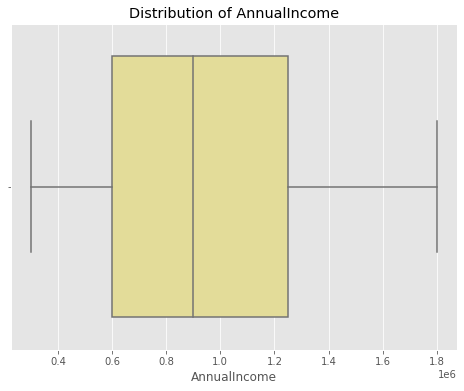

In [30]:
# checking the distribution of AnnualIncome

plt.figure(figsize=(8,6))
sns.boxplot(x="AnnualIncome", color="khaki", data=df)
plt.title("Distribution of AnnualIncome")
plt.show()

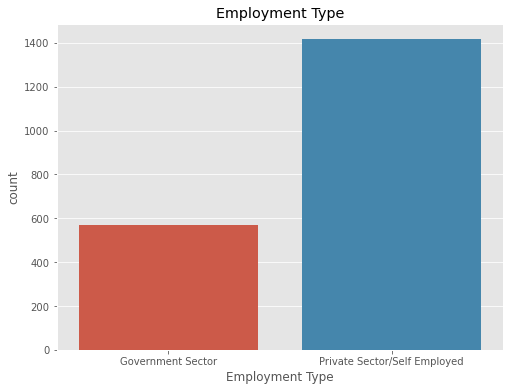

In [31]:
# Employment type

plt.figure(figsize=(8, 6))
sns.countplot(x="Employment Type", data=df)
plt.title('Employment Type')
plt.show()

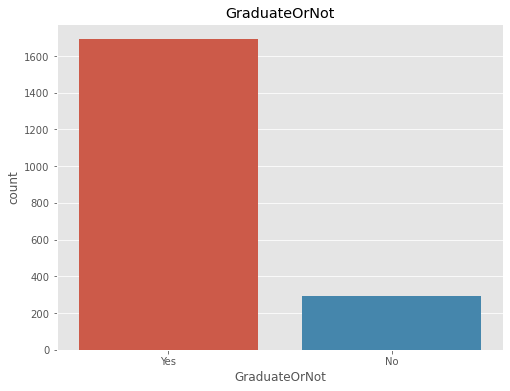

In [32]:
# GraduateOrNot

plt.figure(figsize=(8, 6))
sns.countplot(x="GraduateOrNot", data=df)
plt.title('GraduateOrNot')
plt.show()

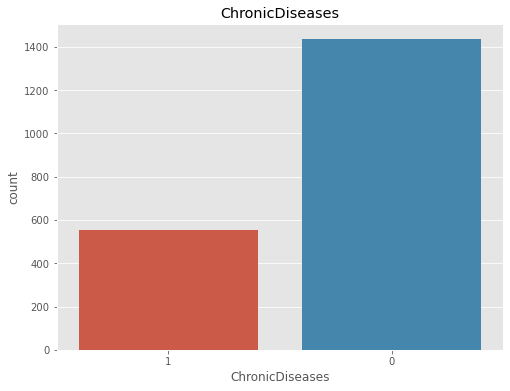

In [33]:
# ChronicDiseases

plt.figure(figsize=(8, 6))
sns.countplot(x="ChronicDiseases", data=df)
plt.title('ChronicDiseases')
plt.show()

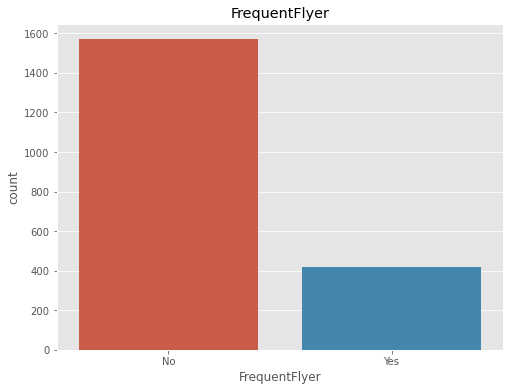

In [34]:
# FrequentFlyer

plt.figure(figsize=(8, 6))
sns.countplot(x="FrequentFlyer", data=df)
plt.title('FrequentFlyer')
plt.show()

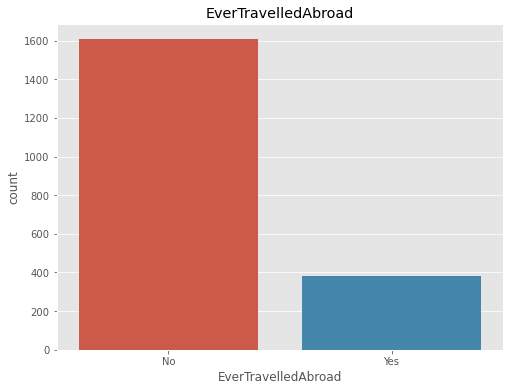

In [35]:
# EverTravelledAbroad

plt.figure(figsize=(8, 6))
sns.countplot(x="EverTravelledAbroad", data=df)
plt.title('EverTravelledAbroad')
plt.show()

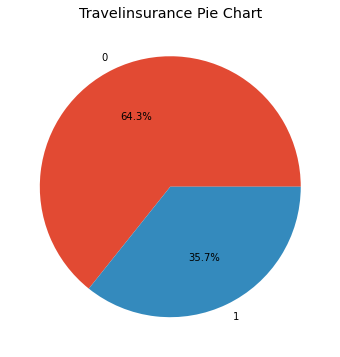

In [36]:
# travel insurance 

travelinsurance_counts = df['TravelInsurance'].value_counts().reset_index()
travelinsurance_counts.columns = ['Category', 'Count']

#  pie chart 
plt.figure(figsize=(8, 6))
plt.pie(travelinsurance_counts['Count'], labels=travelinsurance_counts['Category'], autopct='%1.1f%%')
plt.title('Travelinsurance Pie Chart')
plt.show()

### **BIVARIATE ANALYSIS**


In [28]:
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')